In [2]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)
loan_dataset = pd.read_csv('loan.csv')
loan_dataset.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# DATA CLEANING



##### Lets first check the missing values in the loan dataset

In [4]:
#checking the dataset for null values
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### It is oveserved that, we have a lot columns containing the null data. So our task is to clean the data from null/Nan values


In [5]:
#Droping na values columnvise
loan_dataset.dropna(axis=1,how='all',inplace=True)

#checking the shape of dataset
loan_dataset.shape


(39717, 57)

### Rechecking if we have more null/NAN column available

In [6]:
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Dropping Unwanted Columns

#### Below are the list of columns which will not impact the our analysis post loan approval
- id<br>
- member_id<br>
- pub_rec_bankruptcies<br>
- emp_title<br>
- tax_liens<br>
- delinq_amnt<br>
- chargeoff_within_12_mths<br>
- acc_now_delinq<br>
- collections_12_mths_ex_med<br>
- url<br>
- desc<br>
- mths_since_last_record<br>
- title <br>
- zip_code<br>
- policy_code<br>
- out_prncp_inv<br>
- addr_state<br>
- application_type<br>
- recoveries<br>
- last_credit_pull_d<br>
- revol_bal<br>
- delinq_2yrs<br>
- out_prncp<br>
- total_pymnt<br>
- total_rec_prncp<br>
- total_rec_int<br>
- total_rec_late_fee<br>
- recoveries<br>
- collection_recovery_fee<br>
- last_pymnt_d<br>
- last_pymnt_amnt<br>
- next_pymnt_d<br>
- mths_since_last_delinq<br>

In [7]:
loan_dataset=loan_dataset.drop(['id','member_id','pub_rec_bankruptcies','emp_title','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med',
                               'url','desc','mths_since_last_record','title','zip_code','policy_code','out_prncp_inv','addr_state','application_type','recoveries','last_credit_pull_d','revol_bal','delinq_2yrs','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','mths_since_last_delinq'],axis=1)

In [8]:
#rechecking the shape of the dataset
loan_dataset.shape

(39717, 25)

In [9]:
loan_dataset.head(60)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt_inv
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,credit_card,27.65,Jan-85,1,3,0,83.70%,9,f,5833.84
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,car,1.00,Apr-99,5,3,0,9.40%,4,f,1008.71
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,Nov-01,2,2,0,98.50%,10,f,3005.67
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,other,20.00,Feb-96,1,10,0,21%,37,f,12231.89
4,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,other,17.94,Jan-96,0,15,0,53.90%,38,f,3513.33
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,wedding,11.20,Nov-04,3,9,0,28.30%,12,f,5632.21
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,23.51,Jul-05,1,7,0,85.60%,11,f,10110.84
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,car,5.35,Jan-07,2,4,0,87.50%,4,f,3939.14
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,small_business,5.55,Apr-04,2,11,0,32.60%,13,f,646.02
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,n,other,18.08,Sep-04,0,2,0,36.50%,3,f,1469.34


# After Removing all the unwanted columns, let us again check the missing values in columns

In [10]:
loan_dataset.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
pymnt_plan                0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
initial_list_status       0
total_pymnt_inv           0
dtype: int64

### emp_length and revol_util are columns with missing data. 

In [11]:
#checking mode for emp_lenght column
mode = loan_dataset.emp_length.mode()
print("mode: " 
      +mode)

0    mode: 10+ years
Name: emp_length, dtype: object


### If we replace missing value with mode in emp_length, than it will not affect the column

In [12]:
loan_dataset.emp_length.fillna(loan_dataset.emp_length.mode()[0], inplace = True)

In [13]:

loan_dataset = loan_dataset.dropna(subset=['revol_util'],axis=0)

In [14]:
loan_dataset.isna().sum()
loan_dataset.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,Jan-85,1,3,0,83.70%,9,f,5833.84
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,Apr-99,5,3,0,9.40%,4,f,1008.71
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,Nov-01,2,2,0,98.50%,10,f,3005.67
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,Feb-96,1,10,0,21%,37,f,12231.89
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,Jan-96,0,15,0,53.90%,38,f,3513.33


# After standardising let us perform analysis to see who is going to default and this can be achieved by finding either  who fully paid or charged off loans.
- We do anything for the current loans. 
- To remove unwanted data let us remove the records with current loan status

In [15]:
loan_dataset=loan_dataset[loan_dataset['loan_status'] != 'Current']

In [16]:
loan_dataset.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt_inv
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,credit_card,27.65,Jan-85,1,3,0,83.70%,9,f,5833.84
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,car,1.00,Apr-99,5,3,0,9.40%,4,f,1008.71
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,Nov-01,2,2,0,98.50%,10,f,3005.67
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,other,20.00,Feb-96,1,10,0,21%,37,f,12231.89
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,wedding,11.20,Nov-04,3,9,0,28.30%,12,f,5632.21
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,23.51,Jul-05,1,7,0,85.60%,11,f,10110.84
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,car,5.35,Jan-07,2,4,0,87.50%,4,f,3939.14
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,small_business,5.55,Apr-04,2,11,0,32.60%,13,f,646.02
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,n,other,18.08,Sep-04,0,2,0,36.50%,3,f,1469.34
10,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.00,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,16.12,Jan-98,2,14,0,20.60%,23,f,7678.02


# Checking the outliers

<AxesSubplot:xlabel='annual_inc'>

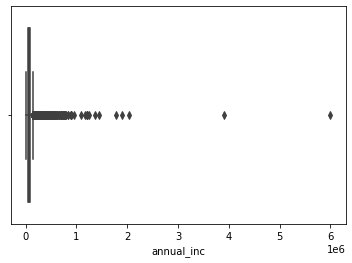

In [17]:


sns.boxplot(loan_dataset['annual_inc'])




<h3> From the above boxplot we can see that their are many outliers. So let's get rid of it </h3>
<p> The outlier might impact the analysis </p>

In [18]:

q1=loan_dataset.annual_inc.quantile(0.25)
q3 =loan_dataset.annual_inc.quantile(0.75)
IQR =  q3-q1
upper_limit = q3+1.5*IQR
lower_limit = q1 - 1.5*IQR
loan_dataset.annual_inc=loan_dataset.annual_inc[loan_dataset.annual_inc < upper_limit]


<AxesSubplot:xlabel='annual_inc'>

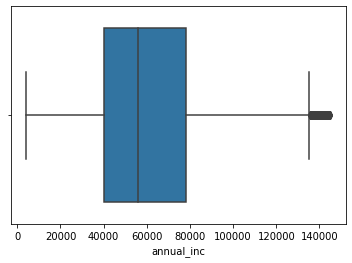

In [19]:
##rechecking the outliers
loan_dataset.head(5)
sns.boxplot(loan_dataset.annual_inc)

# Now since all the outliers of annual_inc are removed, let's check the other columns

Checking loan_amnt column

<AxesSubplot:xlabel='loan_amnt'>

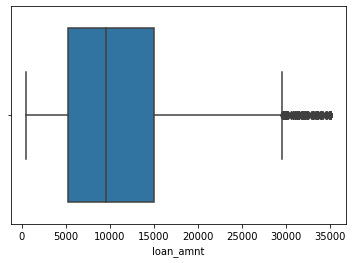

In [20]:
sns.boxplot(loan_dataset.loan_amnt)

Checking funded_amnt column

<AxesSubplot:xlabel='funded_amnt'>

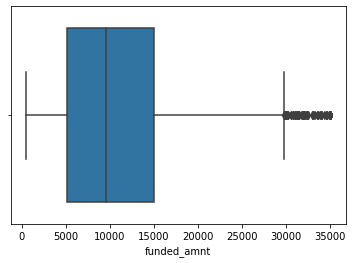

In [21]:
sns.boxplot(loan_dataset.funded_amnt)

 Checking funded_amnt_inv column 

<AxesSubplot:xlabel='funded_amnt_inv'>

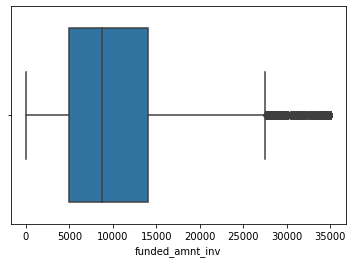

In [22]:
sns.boxplot(loan_dataset.funded_amnt_inv)

Checking installment column

<AxesSubplot:xlabel='installment'>

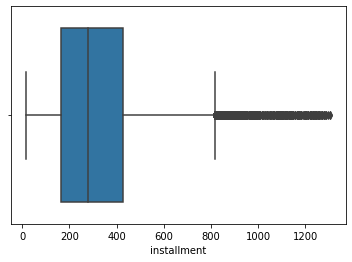

In [23]:
sns.boxplot(loan_dataset.installment)

Checking dti column


<AxesSubplot:xlabel='dti'>

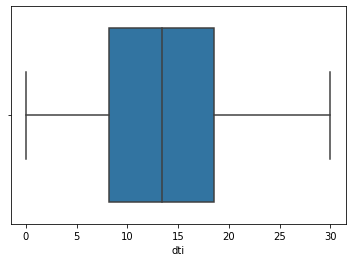

In [24]:
sns.boxplot(loan_dataset.dti)

<h3>As the below columns will be used in our analysis. So let us check the datatype of the below columns</h3>
  

  int_rate
  
 

  revol_util
  

  emp_length

In [25]:
loan_dataset.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
initial_list_status     object
total_pymnt_inv        float64
dtype: object

## Standardizing the data 
- "revol_util" column is an object column, it has continous values. 
- So we should  standardize the data in this column
- "int_rate" is also one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it    might as well be declared a categorical variable. 

In [26]:
loan_dataset.int_rate = pd.to_numeric(loan_dataset.int_rate.apply(lambda x : x.split('%')[0]))

In [27]:
loan_dataset.revol_util = pd.to_numeric(loan_dataset.revol_util.apply(lambda x : x.split('%')[0]))

In [28]:
loan_dataset.emp_length = pd.to_numeric(loan_dataset.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [29]:
loan_dataset.head(20)

loan_dataset.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util             float64
total_acc                int64
initial_list_status     object
total_pymnt_inv        float64
dtype: object

# Now let us check the maximum count of defaulters from various categories

<h3>Purpose count plot for loan status</h3>

15.69

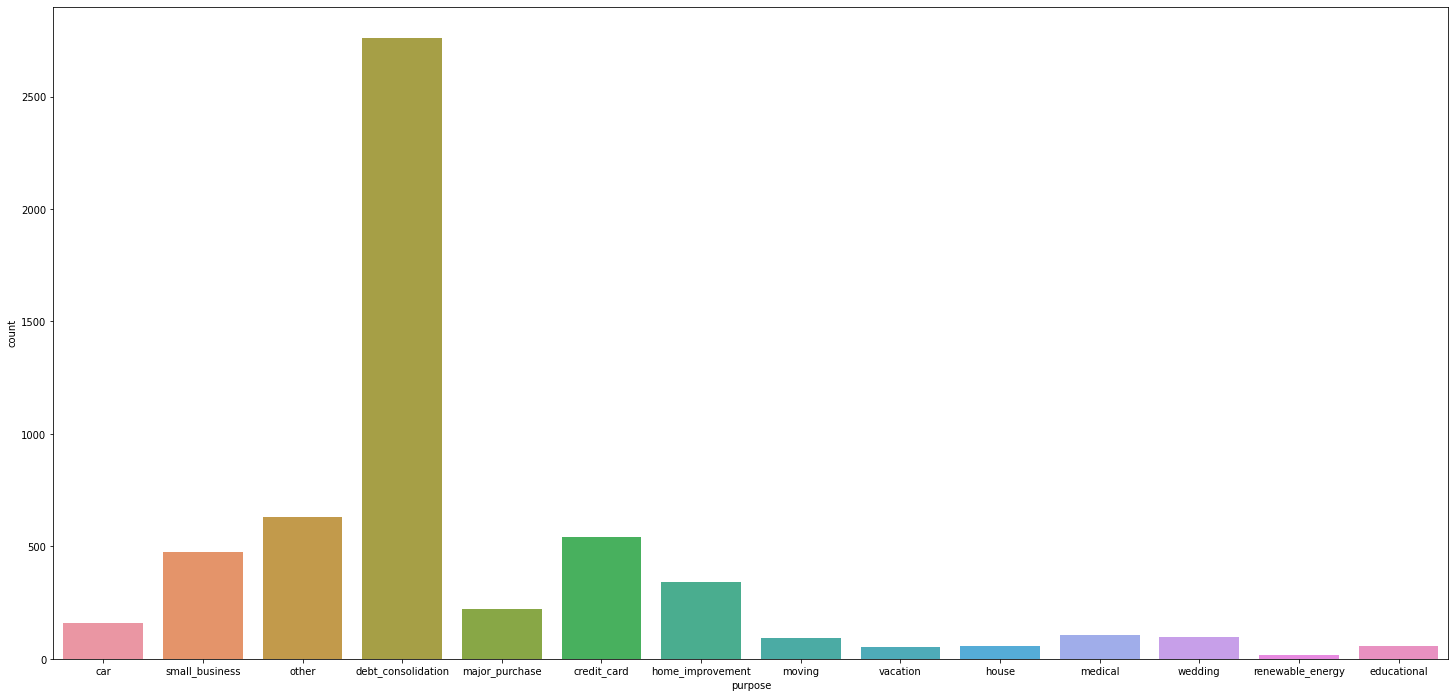

In [30]:
fig,ax = plt.subplots(figsize = (25,12))




sns.countplot(x="purpose",data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

loan_dataset.installment.min()


<h3>Grade count plot for loan status </h3>

<AxesSubplot:xlabel='grade', ylabel='count'>

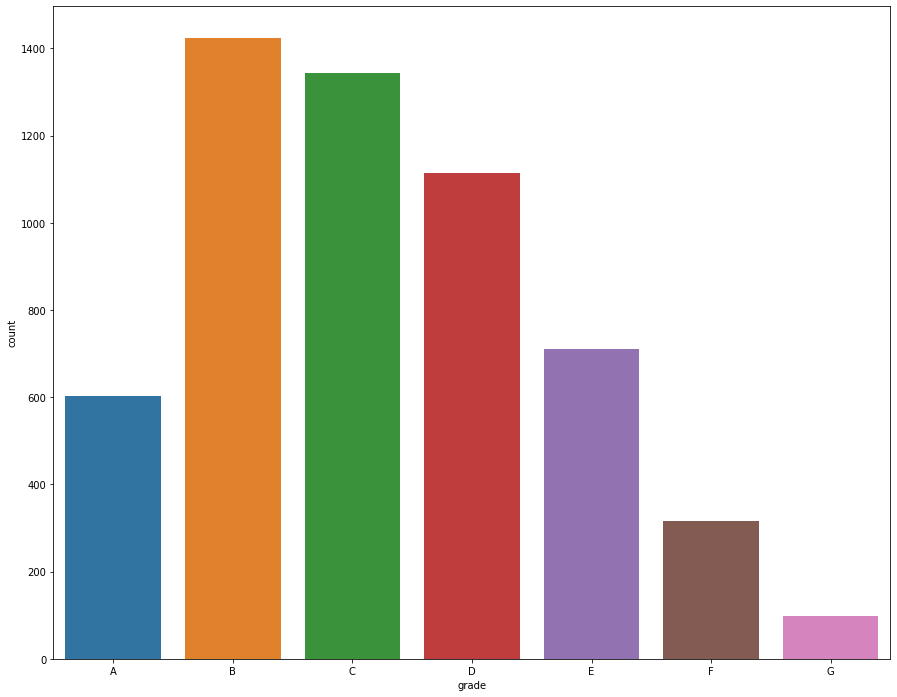

In [31]:
fig,ax = plt.subplots(figsize = (15,12))
sns.countplot(x="grade",order =['A','B','C','D','E','F','G'],data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<h3>Home ownership count plot for loan status </h3>

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

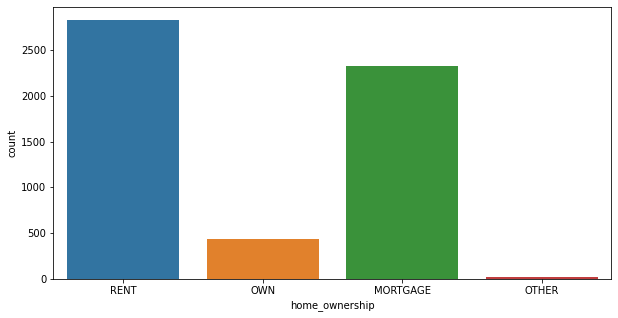

In [32]:
fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x="home_ownership",data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<h3>emp_length plot for loan status </h3>

<AxesSubplot:xlabel='emp_length', ylabel='count'>

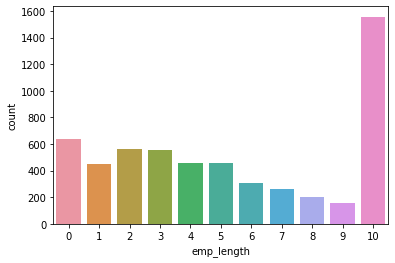

In [33]:
sns.countplot(x="emp_length",data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<h3>verification_status count plot for loan status </h3>

<AxesSubplot:xlabel='verification_status', ylabel='count'>

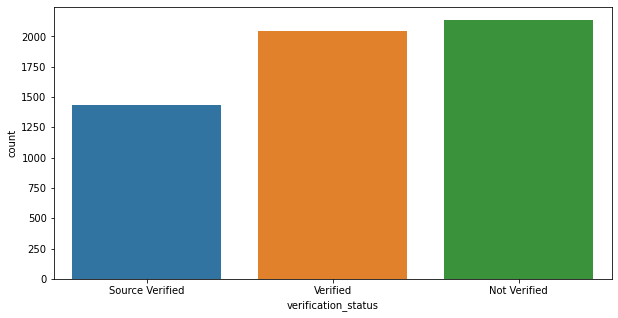

In [34]:
fig,ax = plt.subplots(figsize = (10,5))

sns.countplot(x="verification_status",data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])


<h2>Let us now create bins for the numeric data</h2>

In [35]:
loan_dataset['int_rate_groups'] = pd.cut(loan_dataset['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_dataset['annual_inc_groups'] = pd.cut(loan_dataset['annual_inc'],bins=5,precision=0,labels=['3k-30k','30k-60k','60k-85k','85k-110K','110k-140k'])


<h3>Interest rate group  count plot for loan status </h3>

<AxesSubplot:xlabel='int_rate_groups', ylabel='count'>

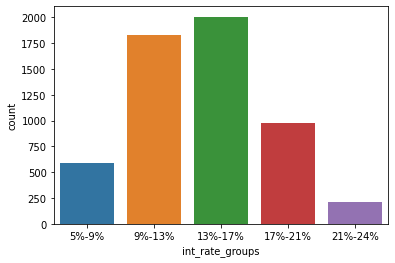

In [36]:
sns.countplot(x="int_rate_groups",data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<h3>Annual_inc_groups count plot for loan status </h3>

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

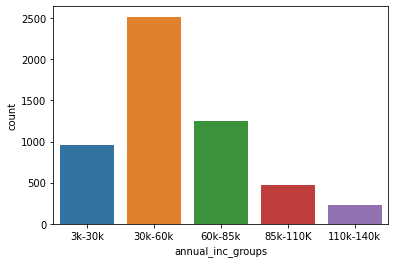

In [37]:
sns.countplot(x="annual_inc_groups",data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

## CORRELATION METRIX USE FOR VARIABLE 

- here we can see the correlation between the multiple variables in the plot.
- its also show depends on the type of variables 

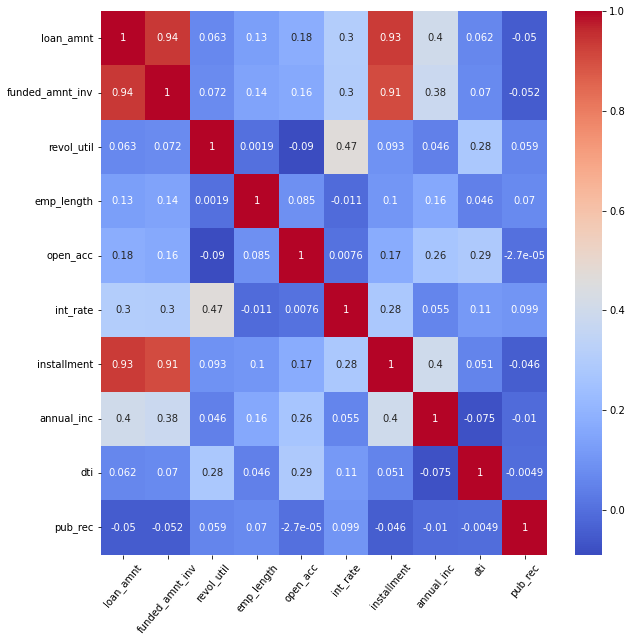

In [38]:
numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec',]
correlation_matrix = loan_dataset[numeric_columns].corr()
f,ax = plt.subplots(figsize= (10,10))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()

# Annual income vs Loan amount

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

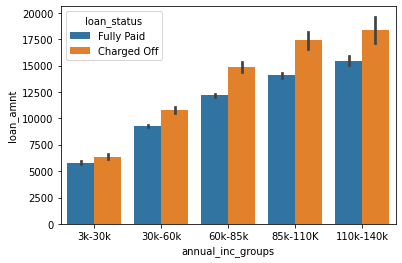

In [39]:
sns.barplot(x = 'annual_inc_groups',y = 'loan_amnt',hue ='loan_status',data = loan_dataset)

# Interest_Rate_Group vs Loan_amnt

<AxesSubplot:xlabel='int_rate_groups', ylabel='loan_amnt'>

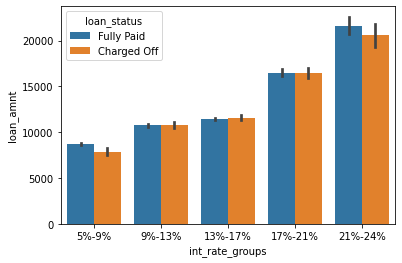

In [40]:
sns.barplot(x = 'int_rate_groups',y = 'loan_amnt',hue ='loan_status',data = loan_dataset)

# Home_ownership vs Loan_amnt

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

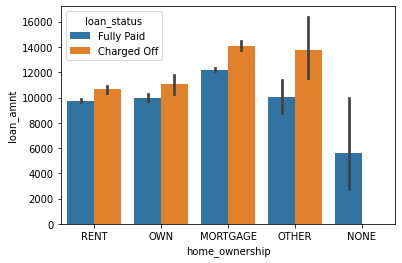

In [41]:

sns.barplot(x = 'home_ownership',y = 'loan_amnt',hue ='loan_status',data = loan_dataset)

# grade vs loan_amnt

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

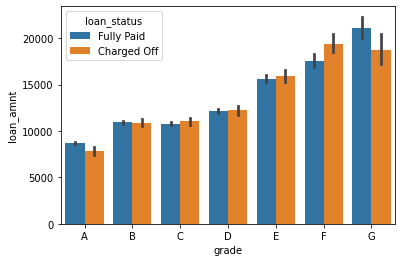

In [42]:
sns.barplot(x = 'grade',y = 'loan_amnt',hue ='loan_status',data = loan_dataset,order=['A','B','C','D','E','F','G'])

# term vs loan_amnt

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

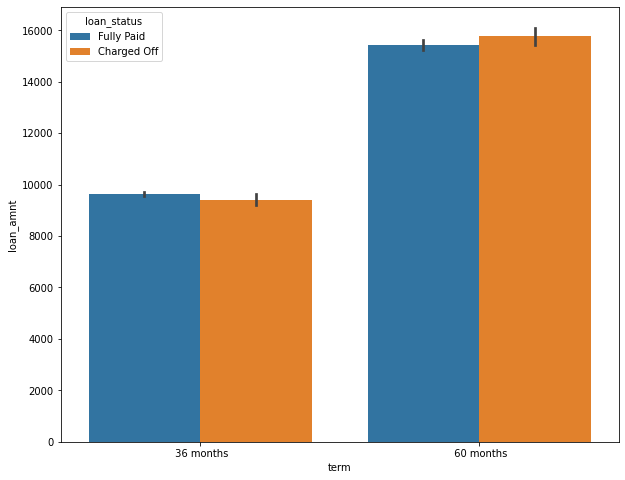

In [43]:
fig,ax = plt.subplots(figsize = (10,8))
sns.barplot(x = 'term',y = 'loan_amnt',hue ='loan_status',data = loan_dataset)

Loan_amnt VS purpose

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

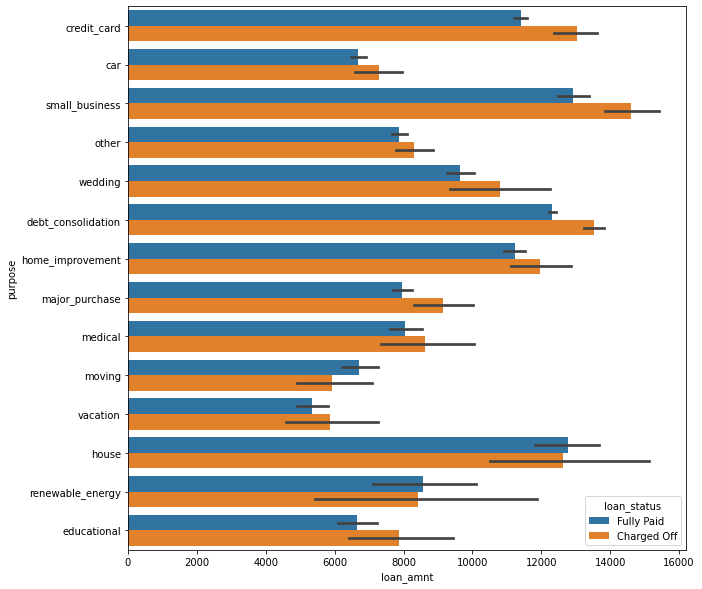

In [44]:

fig,ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'loan_amnt',y = 'purpose',hue ='loan_status',data = loan_dataset)

Loan_Amnt vs verification_status

<AxesSubplot:xlabel='loan_amnt', ylabel='verification_status'>

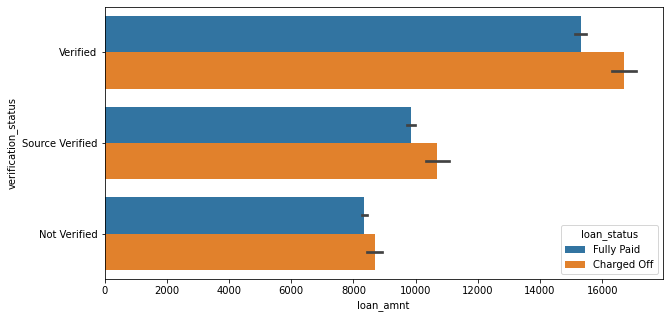

In [45]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'loan_amnt',y = 'verification_status', hue ='loan_status',data = loan_dataset)

grade vs int_rate

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

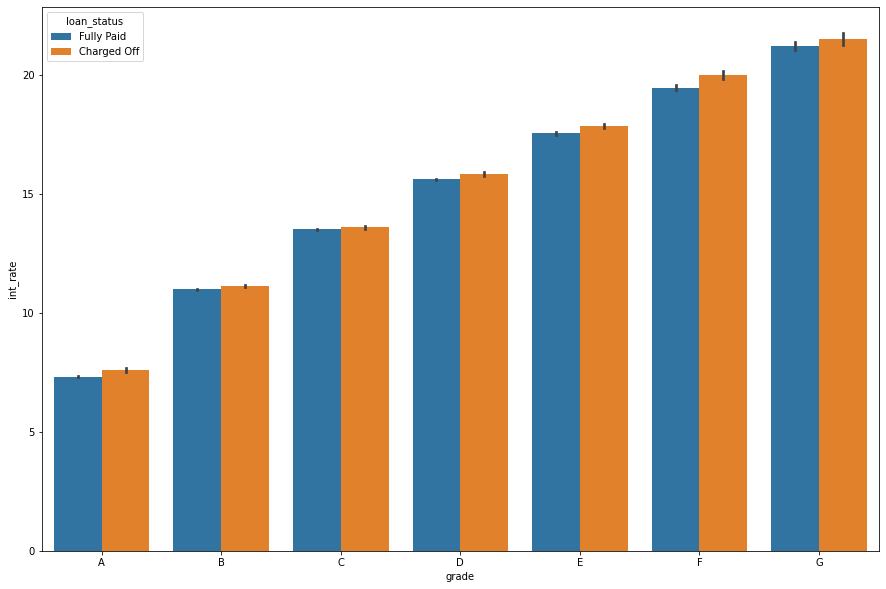

In [46]:
fig,ax = plt.subplots(figsize = (15,10))
sns.barplot(x = 'grade',y = 'int_rate',hue ='loan_status',data = loan_dataset,order=['A','B','C','D','E','F','G'])

<h2>So from the above analysis , the over all conclusion is that</h2><br>

  -  In the purpose column, it is observed that <strong>people with the purpose of debt_consolidation are more in defaulter list </strong>.<br>
  <br>
  
  -  Similarly in grade column with <strong>grade B, grade C and grade D</strong> have the highest count of defaulters<br>
  <br>
  
  -  When we look into the <strong>ownership column, the people who are mostly living in rented house are in defaulter list probably since they have to pay rent every month</strong><br>
  <br>
  
  -  In the <strong>employee length column people with length of 10 years</strong> are more into defaulter list.<br>
  <br>
  
  -  In the <strong>verification_status column, the people who are not verified are highest</strong> in the defaulter list<br>
  <br>
  
  -  In the int_rate_group column, it is observed that people with people in the <strong>range of interest rate 13% to 17% are   more like to pay emi late</strong>.<br>
  <br>
  
  -  Similary people in the <strong>income group of 30k-60k are highest in the defaulter list</strong>.<br>
  <br>


  
  -  Also we can see that , people who  got loan for the interest rate zone of 21% -24% are least in the defaulter zone<br> 


  -  We can observe that people are more in default zone when they have taken the loan for the interest rate of 13% to 17%<br>

  -  If we observe the grade vs loan amount graph , we can notice that people from F grade are more in defaulter zone than in grade E and grade C.<br>

  -  If we look into the term vs loan_amt graph we can observe that there is a slight increase in the defaulters for the term of 60 months.<br>


  -  Applicants who have taken a loan for small business and the loan amount is greater than 14k
  



<h3>hence it is advised that the company should avoid paying loan to these people</h3>	